In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [151]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [189]:
from sklearn.model_selection import train_test_split

x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [191]:
train_data=x_train.join(y_train)

In [192]:
train_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
60,2,84,0,0,0,0.0,0.304,21,0
618,9,112,82,24,0,28.2,1.282,50,1
346,1,139,46,19,83,28.7,0.654,22,0
294,0,161,50,0,0,21.9,0.254,65,0
231,6,134,80,37,370,46.2,0.238,46,1
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'DiabetesPedigreeFunction'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>,
        <Axes: title={'center': 'BMI'}>]], dtype=object)

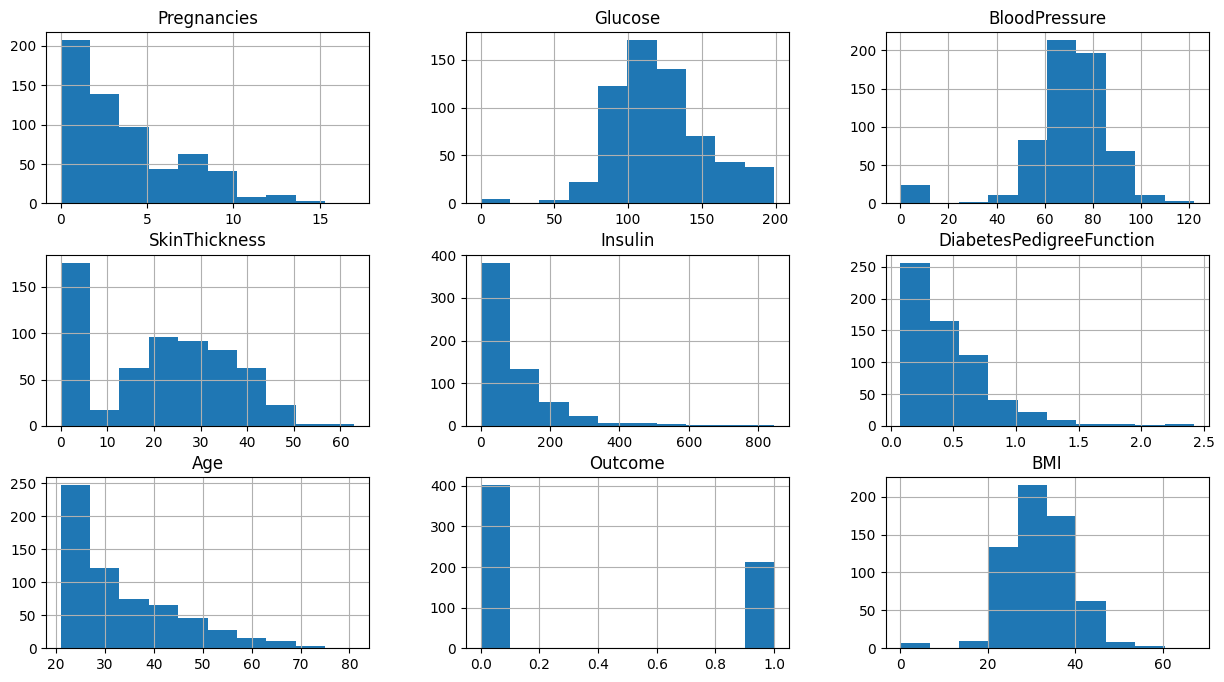

In [159]:
train_data.hist(figsize=(15,8))


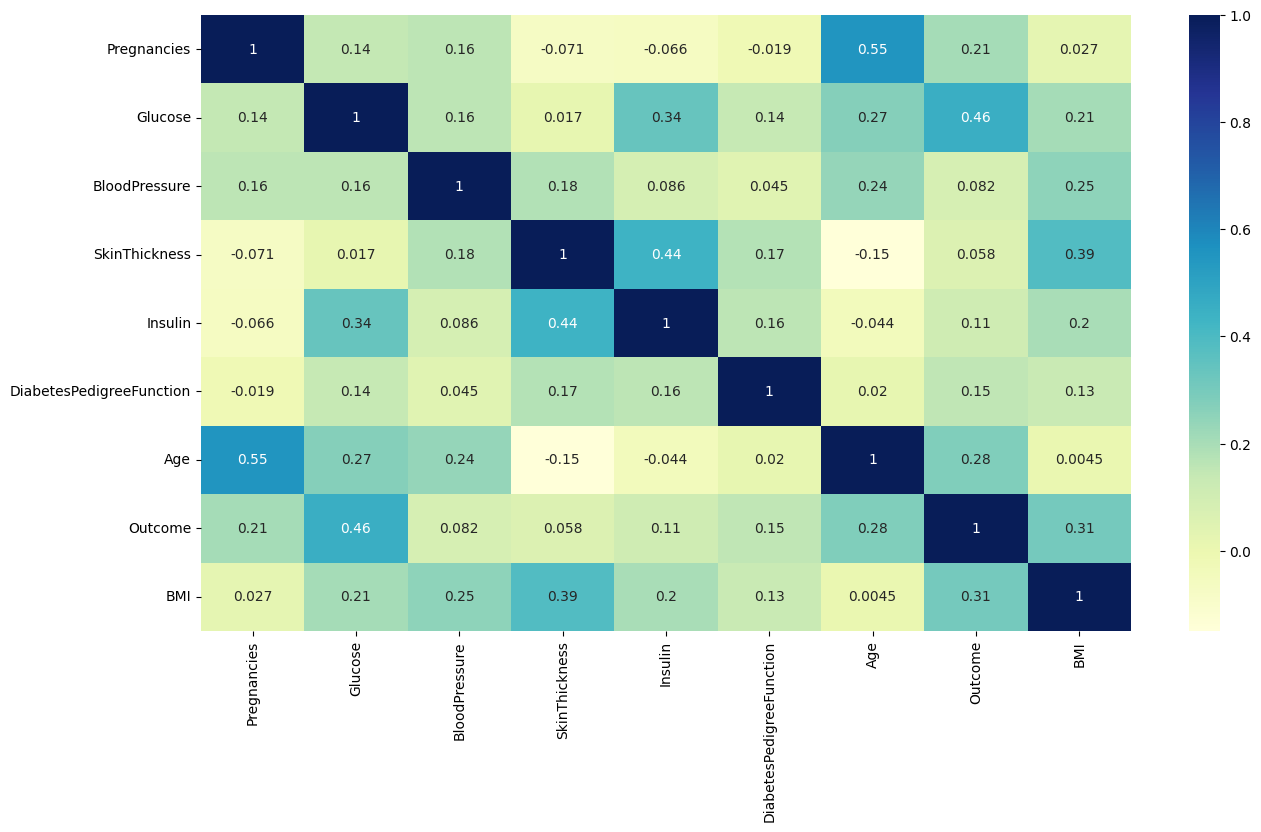

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming train_data is your DataFrame
# Replace train_data with your actual DataFrame name

# Drop rows with any NaN values
train_data_cleaned = train_data.dropna()

# Convert all columns to numeric, if possible
train_data_cleaned = train_data_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop columns that couldn't be converted to numeric (if any)
train_data_cleaned = train_data_cleaned.dropna(axis=1)

plt.figure(figsize=(15, 8))
sns.heatmap(train_data_cleaned.corr(), annot=True, cmap="YlGnBu")
plt.show()


<Axes: xlabel='Age', ylabel='Glucose'>

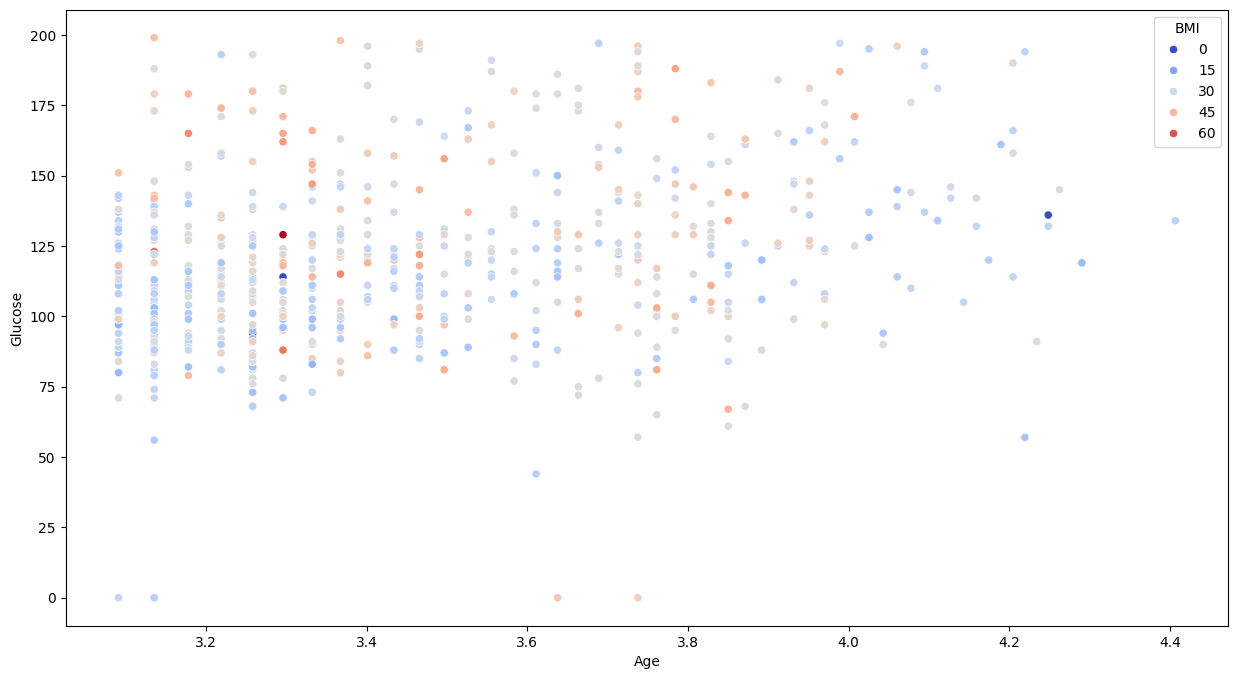

In [166]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Age",y="Glucose",data=train_data,hue="BMI",palette="coolwarm")

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

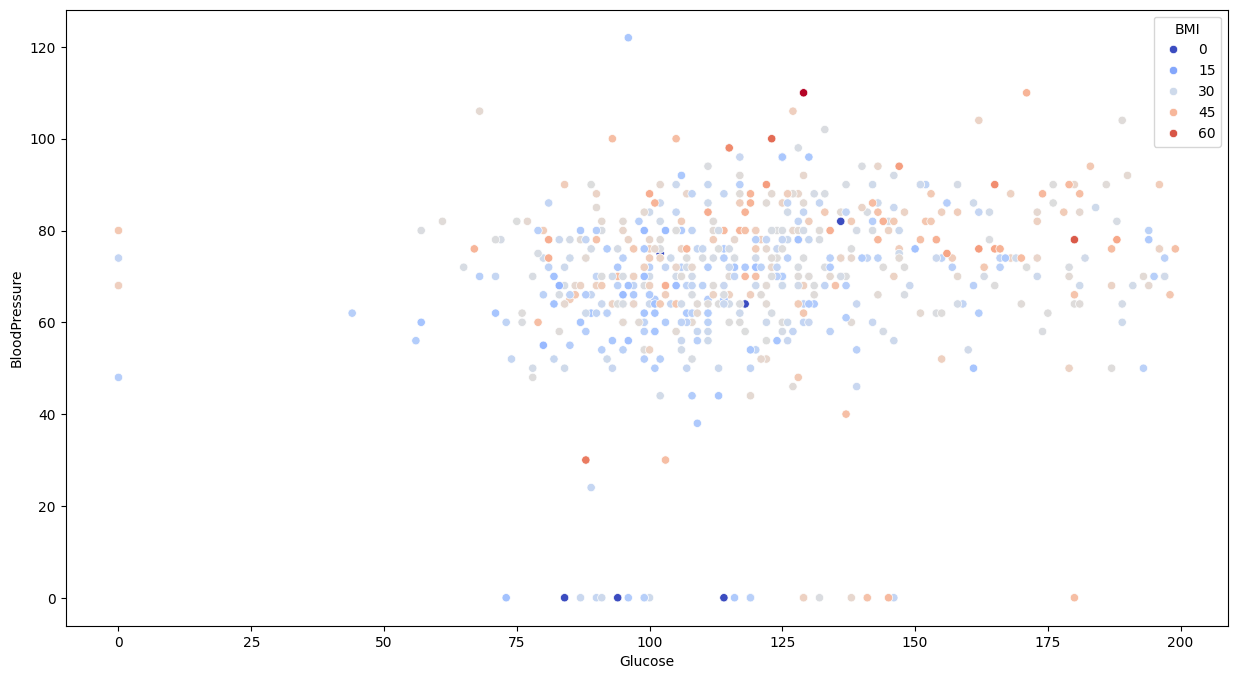

In [167]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Glucose",y="BloodPressure",data=train_data,hue="BMI",palette="coolwarm")


In [194]:
# Convert all column names to strings
train_data.columns = train_data.columns.astype(str)

# Check for non-numeric columns and convert them to numeric if necessary
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
x_train = train_data[numeric_columns].drop(['Outcome'], axis=1)
y_train = train_data['Outcome']

# Handle infinity or large values
x_train.replace([np.inf, -np.inf], np.nan, inplace=True)
x_train.fillna(x_train.mean(), inplace=True)

# Define the scaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
x_train_s = scaler.fit_transform(x_train)

# Define the regression model
reg = LinearRegression()

# Fit the regression model to the scaled training data
reg.fit(x_train_s, y_train)

print("Model coefficients:", reg.coef_)
print("Model intercept:", reg.intercept_)



Model coefficients: [ 0.03465559  0.1803234  -0.04219339  0.00820563 -0.03230381  0.11631364
  0.03744793  0.07425473]
Model intercept: 0.34690553745928343


In [195]:

reg.score(x_test,y_test)

c:\Users\saksh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-2506.0779963303366